# Graphiques Servis au moins 1 fois


In [1]:
%run layeringOfServices.ipynp

In [14]:
one_services = dreams_mastersheet[(dreams_mastersheet.age_range !="not_valid_age") & (dreams_mastersheet.age_range != "25-29") & (dreams_mastersheet.fiscal_year != "Q3fy20-Q4fy20") & (dreams_mastersheet.recevoir_1services != "no")  ]

In [15]:
one_services.code.count()

3862

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [17]:
pivot_one = one_services.pivot_table(columns="fiscal_year",values="code",fill_value=0,aggfunc='count')

In [18]:
pivot_one.columns

Index(['FY21Q1', 'FY21Q2', 'FY21Q3', 'FY21Q4'], dtype='object', name='fiscal_year')

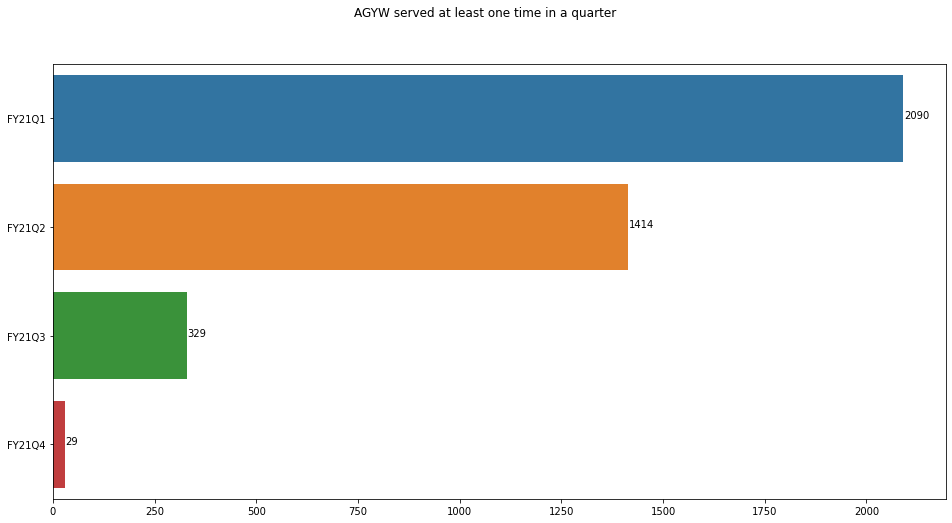

In [19]:
X= list(pivot_one.columns)
Y= pivot_one.values.tolist()[0]
data = []
colonnes = []

for x,y in zip(X,Y):
    data.append(y)
    colonnes.append(x)


df = pd.DataFrame({"fy":colonnes, "dt":data})

plt.subplots(figsize=(16,8))
splot = sns.barplot(x="dt",y="fy",data=df)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW served at least one time in a quarter")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width))
    

plt.savefig("dreams_served_atleast1services",dpi=400)
 